## Multivariate Time Series Forecasting using RNN (LSTM)

- Trying to forecast the future values of a variable where it not only depens on the previous values of itself but it also depends on the previous/current values of the other variables

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

Epoch 1/100
94/94 - 1s - loss: 0.0344 - 845ms/epoch - 9ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0162 - 68ms/epoch - 724us/step
Epoch 3/100
94/94 - 0s - loss: 0.0125 - 93ms/epoch - 984us/step
Epoch 4/100
94/94 - 0s - loss: 0.0113 - 100ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0104 - 84ms/epoch - 889us/step
Epoch 6/100
94/94 - 0s - loss: 0.0092 - 65ms/epoch - 694us/step
Epoch 7/100
94/94 - 0s - loss: 0.0082 - 63ms/epoch - 669us/step
Epoch 8/100
94/94 - 0s - loss: 0.0072 - 62ms/epoch - 655us/step
Epoch 9/100
94/94 - 0s - loss: 0.0064 - 65ms/epoch - 688us/step
Epoch 10/100
94/94 - 0s - loss: 0.0055 - 79ms/epoch - 845us/step
Epoch 11/100
94/94 - 0s - loss: 0.0047 - 99ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0040 - 81ms/epoch - 866us/step
Epoch 13/100
94/94 - 0s - loss: 0.0035 - 77ms/epoch - 820us/step
Epoch 14/100
94/94 - 0s - loss: 0.0031 - 80ms/epoch - 853us/step
Epoch 15/100
94/94 - 0s - loss: 0.0027 - 78ms/epoch - 826us/step
Epoch 16/100
94/94 - 0s - loss: 0.0025

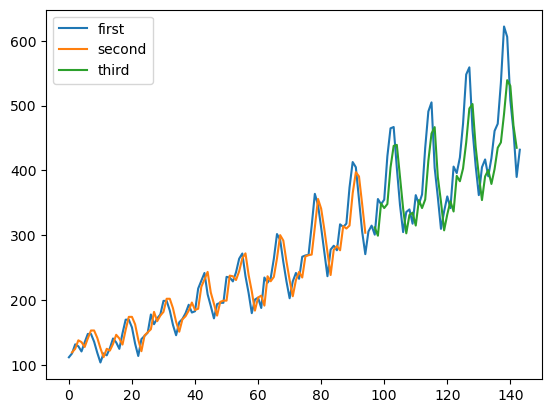

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='first')
plt.plot(trainPredictPlot, label='train')
plt.plot(testPredictPlot, label='test')
plt.legend()
plt.show()

In [8]:
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390
